Промпт 
На основе DataFrame df с транзакциями:
Сгруппируй данные по колонке item (товар).
Для каждого товара рассчитай сумму проданных штук: sum(quantity).
Отсортируй результат по убыванию количества и выдели ТОП-5 самых продаваемых товаров.
Сохрани название товара, занимающего первое место, в переменную top_1_item.
Подсчитай количество уникальных товаров (уникальных значений) в столбце item.
Выведи полученные результаты.

In [1]:
import pandas as pd

# Загрузка данных (предполагаем, что файл лежит рядом)
df = pd.read_csv('transactions_diy.csv')

# --- Шаг 1, 2 и 3: Группировка и поиск ТОП-5 товаров по количеству (quantity) ---
# Мы используем метод цепочек (chaining) для чистоты кода.
# .groupby('item')['quantity'].sum() -> Группируем и суммируем
# .nlargest(5) -> Оптимизированный способ сразу взять 5 самых больших значений (быстрее сортировки)
# .reset_index() -> Превращаем результат обратно в удобный DataFrame

top_5_by_quantity = (
    df.groupby('item')['quantity']
    .sum()
    .nlargest(5)
    .reset_index()
)

# --- Шаг 4: Выбор товара-лидера ---
# Берем значение из первой строки ('iloc[0]') колонки 'item'
top_1_item = top_5_by_quantity.iloc[0]['item']

# --- Шаг 5: Подсчет уникальных товаров ---
# Метод nunique() считает количество уникальных значений в Series
unique_items_count = df['item'].nunique()

# --- Шаг 6: Вывод результатов ---
print("ТОП-5 товаров по объему продаж (шт.):")
print(top_5_by_quantity)
print("-" * 30)
print(f"Товар с наибольшим количеством продаж: {top_1_item}")
print(f"Всего уникальных товаров в базе: {unique_items_count}")

ТОП-5 товаров по объему продаж (шт.):
       item  quantity
0  sku27292     29095
1  sku17558     19690
2  sku26161     18902
3  sku18190     18137
4   sku3697     18080
------------------------------
Товар с наибольшим количеством продаж: sku27292
Всего уникальных товаров в базе: 30566


Промпт 
На основе DataFrame с транзакциями:
Обратись к колонке item (идентификатор товара).
Вычисли количество уникальных значений в этом столбце (исключая дубликаты).
Сохрани полученное число в переменную unique_items_count.
Выведи результат на экран с поясняющим текстом.

In [2]:
import pandas as pd

# 1. Загрузка данных
df = pd.read_csv('transactions_diy.csv')

# 2. Подсчет уникальных значений
# Метод .nunique() оптимизирован для быстрого подсчета уникальных хешей
unique_items_count = df['item'].nunique()

# 3. Вывод результата
# Используем f-строку для чистого вывода
print(f"Количество уникальных товаров (SKU) в базе данных: {unique_items_count}")

Количество уникальных товаров (SKU) в базе данных: 30566


Промпт 
На основе DataFrame с транзакциями:
Преобразуй колонку tr_date в формат даты (datetime), учитывая формат ДД.ММ.ГГГГ.
Отфильтруй данные: определи максимальную дату в наборе и оставь только транзакции за последние 3 месяца от этой даты.
Сгруппируй отфильтрованные данные по колонке item (товар).
Для каждого товара рассчитай сумму выручки: sum(amount).
Отсортируй результат и найди один товар с максимальной суммой продаж.
Выведи название этого товара и сумму его продаж.

In [3]:
import pandas as pd

# 1. Загрузка данных
df = pd.read_csv('transactions_diy.csv')

# 2. Преобразование даты
# Указываем format='%d.%m.%Y', так как в данных дата вида "01.09.2017"
df['tr_date'] = pd.to_datetime(df['tr_date'], format='%d.%m.%Y')

# 3. Определение временного интервала
# Находим самую последнюю дату в датасете
max_date = df['tr_date'].max()
# Вычисляем дату, которая была 3 месяца назад от последней
start_date = max_date - pd.DateOffset(months=3)

# 4. Фильтрация (оставляем только "свежие" данные)
df_recent = df[df['tr_date'] >= start_date]

# 5. Группировка и поиск лидера по выручке (amount)
# Используем .nlargest(1), чтобы сразу получить и название товара, и сумму
top_sales_item = (
    df_recent.groupby('item')['amount']
    .sum()
    .nlargest(1)
)

# 6. Вывод результата
print(f"Анализ периода с {start_date.date()} по {max_date.date()}")
print("-" * 40)
print("Товар с наибольшим объемом продаж (по сумме выручки):")
# Выводим красиво: индекс (имя товара) и значение (сумма)
print(f"Товар: {top_sales_item.index[0]}, Выручка: {top_sales_item.values[0]}")

Анализ периода с 2019-07-31 по 2019-10-31
----------------------------------------
Товар с наибольшим объемом продаж (по сумме выручки):
Товар: sku26161, Выручка: 1133094


Промпт
На основе DataFrame с транзакциями:

Преобразуй колонку tr_date в формат даты (datetime), используя формат ДД.ММ.ГГГГ.
Отфильтруй данные: выбери только транзакции за май 2018 года (с 01.05.2018 по 31.05.2018).
В отфильтрованном наборе данных обратись к колонке bcode (идентификатор магазина/счета).
Очисти данные (по желанию): убедись, что идентификаторы — это строки, и удали пустые значения или пропуски, если они есть.
Подсчитай количество уникальных значений в колонке bcode.
Выведи результат.

In [4]:
import pandas as pd

# 1. Загрузка данных
df = pd.read_csv('transactions_diy.csv')

# 2. Преобразование даты
df['tr_date'] = pd.to_datetime(df['tr_date'], format='%d.%m.%Y')

# 3. Фильтрация данных за Май 2018
# Создаем маску для выборки
mask_may_2018 = (df['tr_date'] >= '2018-05-01') & (df['tr_date'] <= '2018-05-31')

# Применяем фильтр и создаем явную копию, чтобы избежать SettingWithCopyWarning
df_may = df.loc[mask_may_2018].copy()

# 4. Подсчет уникальных магазинов (bcode)
# Сначала удаляем возможные пропуски (NaN) в колонке bcode, если они важны
valid_bcodes = df_may['bcode'].dropna()

# Считаем уникальные значения
unique_bcode_count = valid_bcodes.nunique()

# 5. Вывод результата
print(f"Период: Май 2018")
print(f"🎯 Количество уникальных магазинов (bcode): {unique_bcode_count}")

Период: Май 2018
🎯 Количество уникальных магазинов (bcode): 9315


Промпт 
На основе DataFrame с транзакциями:
Сгруппируй данные по колонке item (товар).
Для каждого товара рассчитай среднее значение (mean) и стандартное отклонение (std) по колонке quantity.
Исключи товары, у которых среднее значение равно 0 (во избежание деления на ноль).
Рассчитай коэффициент вариации (CV) по формуле: (std / mean) * 100.
Присвой категорию (XYZ) каждому товару на основе CV:
Группа X (стабильный спрос): CV < 10%
Группа Y (умеренный спрос): 10% <= CV < 25%
Группа Z (нестабильный спрос): CV >= 25%
Подсчитай количество товаров в каждой группе.
Выведи количество товаров в группе "Z" и общую статистику по группам.

In [5]:
import pandas as pd
import numpy as np

# 1. Загрузка данных
df = pd.read_csv('transactions_diy.csv')

# 2. Агрегация метрик (среднее и стандартное отклонение)
stats = df.groupby('item')['quantity'].agg(['mean', 'std'])

# Обработка случаев, где std = NaN (например, была всего одна продажа)
stats['std'] = stats['std'].fillna(0)

# 3. Фильтрация (убираем товары с нулевым средним, если такие есть)
stats = stats[stats['mean'] > 0]

# 4. Расчет коэффициента вариации (CV) в процентах
stats['cv'] = (stats['std'] / stats['mean']) * 100

# 5. Категоризация (XYZ) с использованием pd.cut (векторизованный метод)
# Bins: [0, 10, 25, infinity] -> границы групп
# Labels: ['X', 'Y', 'Z'] -> названия групп
stats['xyz_group'] = pd.cut(
    stats['cv'], 
    bins=[-float('inf'), 10, 25, float('inf')], 
    labels=['X', 'Y', 'Z'],
    right=False # right=False означает интервал [a, b) -> включает 10, не включает 25 и т.д.
)

# 6. Подсчет статистики
group_counts = stats['xyz_group'].value_counts().sort_index()
z_group_count = group_counts.get('Z', 0)

# 7. Вывод результатов
print("Распределение товаров по группам XYZ:")
print("-" * 40)
print(group_counts)
print("-" * 40)
print(f"🎯 Количество товаров в группе Z (нестабильный спрос): {z_group_count}")

Распределение товаров по группам XYZ:
----------------------------------------
xyz_group
X    11467
Y     1538
Z    17561
Name: count, dtype: int64
----------------------------------------
🎯 Количество товаров в группе Z (нестабильный спрос): 17561


Промпт 
На основе полученной матрицы ABC-XYZ:

Подготовка данных: Загрузи данные. Преобразуй колонку tr_date в формат даты (формат в файле: дд.мм.гггг). Отфильтруй данные за последние 6 месяцев от максимальной даты в наборе.
ABC-анализ (по выручке amount): Рассчитай долю накопительного итога.
Группа A: 0–80% выручки.
Группа B: 80–95% выручки.
Группа C: 95–100% выручки.
XYZ-анализ (по стабильности спроса quantity): Рассчитай коэффициент вариации (CV).
Важно: Если товар продавался всего 1 раз (стандартное отклонение = NaN), считай его спрос стабильным (CV = 0).
Группа X (стабильные): CV < 10%.
Группа Y (средние): 10% <= CV < 25%.
Группа Z (нестабильные): CV >= 25%.
Итог: Сведи результаты в единую таблицу, построй матрицу (тепловую карту) количества товаров и сохрани итоговый отчет в CSV.

✅ Данные загружены. Всего строк: 1008688
📅 Период анализа: с 2019-04-30 по 2019-10-31

📊 Матрица распределения товаров:
Группа_XYZ     X    Y     Z
Группа_ABC                 
A           1301  210  2357
B           2186  225  3384
C           6679  236  5246


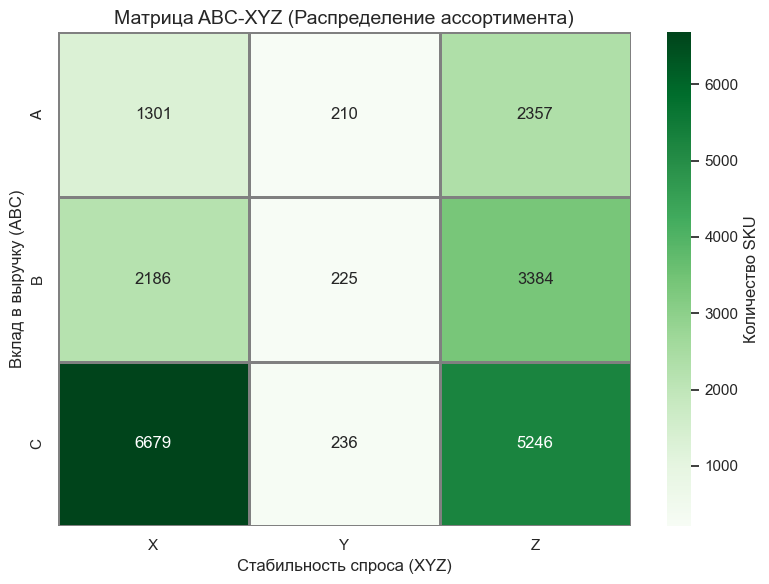


💾 Результат сохранен в файл: abc_xyz_analysis_final.csv
💀 Товаров в сегменте CZ (кандидаты на вывод): 5246


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Настройка стиля графиков
sns.set(style="whitegrid")

# --- 1. Загрузка и предобработка данных ---
try:
    df = pd.read_csv('transactions_diy.csv')
    # Преобразуем дату. Исходя из скриншота, формат '01.09.2017' -> день.месяц.год
    df['tr_date'] = pd.to_datetime(df['tr_date'], format='%d.%m.%Y')
    
    print(f"✅ Данные загружены. Всего строк: {len(df)}")
except Exception as e:
    print(f"❌ Ошибка загрузки: {e}")
    exit()

# Фильтр: берем последние 6 месяцев данных для актуальности анализа
last_date = df['tr_date'].max()
start_date = last_date - pd.DateOffset(months=6)
df_work = df[df['tr_date'] >= start_date].copy()

print(f"📅 Период анализа: с {start_date.date()} по {last_date.date()}")

# --- 2. ABC-анализ (по выручке / amount) ---
# Группируем и сортируем
abc_stats = df_work.groupby('item')['amount'].sum().sort_values(ascending=False)

# Считаем накопительный процент (Cumulative Percentage)
total_revenue = abc_stats.sum()
cum_percent = (abc_stats.cumsum() / total_revenue) * 100

# Векторизованное присвоение групп (быстрее, чем apply)
# bins: границы интервалов (0, 80, 95, 100)
# labels: метки групп
abc_groups = pd.cut(
    cum_percent, 
    bins=[0, 80, 95, 100.0001], # 100.0001 чтобы включить ровно 100%
    labels=['A', 'B', 'C'],
    right=True # Интервал включает правую границу: (a, b]
)

# --- 3. XYZ-анализ (по количеству / quantity) ---
# Считаем среднее и стандартное отклонение
xyz_stats = df_work.groupby('item')['quantity'].agg(['mean', 'std'])

# ОПТИМИЗАЦИЯ: Обработка товаров с одной продажей
# Если std == NaN, заменяем на 0 (считаем спрос идеально стабильным, так как вариации нет)
xyz_stats['std'] = xyz_stats['std'].fillna(0)

# Убираем товары с нулевым средним (возвраты или ошибки), чтобы не делить на 0
xyz_stats = xyz_stats[xyz_stats['mean'] > 0]

# Расчет коэффициента вариации (CV) в %
xyz_stats['cv'] = (xyz_stats['std'] / xyz_stats['mean']) * 100

# Векторизованное присвоение групп
# X: < 10%, Y: 10-25%, Z: >= 25%
xyz_groups = pd.cut(
    xyz_stats['cv'],
    bins=[-float('inf'), 10, 25, float('inf')],
    labels=['X', 'Y', 'Z'],
    right=False # Интервал [a, b) -> включает левую, не включает правую
)

# --- 4. Сведение результатов ---
# Объединяем два анализа в один датафрейм
final_df = pd.DataFrame({
    'Группа_ABC': abc_groups,
    'Группа_XYZ': xyz_groups
}).dropna() # Удаляем товары, которые могли выпасть из одного из анализов

# Создаем матрицу (кросс-таблицу) для тепловой карты
matrix = pd.crosstab(final_df['Группа_ABC'], final_df['Группа_XYZ'])

print("\n📊 Матрица распределения товаров:")
print(matrix)

# --- 5. Визуализация ---
plt.figure(figsize=(8, 6))
sns.heatmap(
    matrix, 
    annot=True, 
    fmt='d', 
    cmap='Greens', 
    linewidths=1, 
    linecolor='gray',
    cbar_kws={'label': 'Количество SKU'}
)
plt.title('Матрица ABC-XYZ (Распределение ассортимента)', fontsize=14)
plt.xlabel('Стабильность спроса (XYZ)')
plt.ylabel('Вклад в выручку (ABC)')
plt.tight_layout()
plt.show()

# --- 6. Сохранение ---
output_file = 'abc_xyz_analysis_final.csv'
final_df.to_csv(output_file)
print(f"\n💾 Результат сохранен в файл: {output_file}")

# Дополнительная статистика для проверки
cz_count = matrix.loc['C', 'Z'] if 'C' in matrix.index and 'Z' in matrix.columns else 0
print(f"💀 Товаров в сегменте CZ (кандидаты на вывод): {cz_count}")

Промпт 

Подготовка: Загрузи данные и приведи tr_date к формату даты.
Формирование чеков: Сгруппируй данные по связке ['client', 'tr_date'] и просуммируй amount. Так мы получим сумму покупки за каждый визит клиента (чек).
Поиск одновизитников: Для каждого клиента посчитай количество уникальных дней посещения (nunique или count по сгруппированным чекам).
Выдели тех, у кого количество визитов ровно 1.
Расчет метрик:
Вычисли средний чек одновизитников (среднее по сумме их единственной покупки).
Вычисли средний чек по всем клиентам (среднее по всем чекам за весь период).
Вывод: Выведи количество одновизитников, их средний чек, средний чек по магазину в целом и текстовый вывод: кто тратит больше за один раз?

In [9]:
import pandas as pd
import numpy as np

# --- 1. Загрузка данных ---
try:
    df = pd.read_csv('transactions_diy.csv')
    df['tr_date'] = pd.to_datetime(df['tr_date'], format='%d.%m.%Y')
    print("✅ Данные успешно загружены.")
except Exception as e:
    print(f"❌ Ошибка: {e}")
    exit()

# --- 2. Группировка: Один день = Один чек (Визит) ---
# Мы суммируем все покупки клиента за конкретную дату.
# Получаем таблицу, где каждая строка — это один визит клиента в магазин.
visits = df.groupby(['client', 'tr_date'])['amount'].sum().reset_index()
visits.rename(columns={'amount': 'check_sum'}, inplace=True)

print(f"📊 Всего уникальных визитов (чеков) за период: {len(visits)}")

# --- 3. Определяем частоту визитов для каждого клиента ---
# Считаем, сколько раз каждый клиент встречался в таблице visits
client_counts = visits['client'].value_counts()

# --- 4. Фильтрация: Кто такие "одновизитники"? ---
# Берем ID тех клиентов, у которых количество визитов равно 1
one_visit_client_ids = client_counts[client_counts == 1].index

# Фильтруем таблицу визитов, оставляя только этих клиентов
one_visit_checks = visits[visits['client'].isin(one_visit_client_ids)]

# --- 5. Расчет средних показателей ---
# Средний чек одновизитника
avg_check_one_visit = one_visit_checks['check_sum'].mean()

# Средний чек по ВСЕМ клиентам (глобальное среднее)
avg_check_overall = visits['check_sum'].mean()

# --- 6. Вывод результатов ---
print("\n" + "="*40)
print("🎯 АНАЛИЗ ОДНОВИЗИТНИКОВ")
print("="*40)

print(f"👥 Всего уникальных клиентов: {len(client_counts)}")
print(f"🚶 Из них одновизитников:     {len(one_visit_client_ids)} ({len(one_visit_client_ids)/len(client_counts):.1%} от всех)")
print("-" * 40)
print(f"💰 Средний чек одновизитника:  {avg_check_one_visit:,.2f}")
print(f"🛒 Средний чек по всем (общий): {avg_check_overall:,.2f}")
print("-" * 40)

# Сравнение
if avg_check_one_visit > avg_check_overall:
    diff = avg_check_one_visit - avg_check_overall
    print(f"✅ ВЫВОД: Одновизитники тратят БОЛЬШЕ среднего на +{diff:,.2f}")
else:
    diff = avg_check_overall - avg_check_check_one_visit
    print(f"⚠️ ВЫВОД: Одновизитники тратят МЕНЬШЕ среднего на -{diff:,.2f}")

✅ Данные успешно загружены.
📊 Всего уникальных визитов (чеков) за период: 264339

🎯 АНАЛИЗ ОДНОВИЗИТНИКОВ
👥 Всего уникальных клиентов: 42746
🚶 Из них одновизитников:     12859 (30.1% от всех)
----------------------------------------
💰 Средний чек одновизитника:  3,535.45
🛒 Средний чек по всем (общий): 2,378.04
----------------------------------------
✅ ВЫВОД: Одновизитники тратят БОЛЬШЕ среднего на +1,157.41


Промпт 
Сегментация: Раздели исходные данные транзакций на две части: транзакции лояльных клиентов (Loyal) и транзакции остальных (Regular).
Расчет метрик эффективности: Для каждой группы рассчитай:
Общую выручку (Revenue).
Долю от общей выручки магазина (%).
Средний чек (Total Revenue / Total Visits).
Визуализация: Построй круговую диаграмму (Pie Chart), показывающую вклад каждой группы в общую кассу.
Вывод: Сформулируй бизнес-инсайт: насколько важны эти 275 человек для бизнеса.

💎 Супер-лояльных клиентов (>50 визитов): 275

📊 СРАВНИТЕЛЬНЫЙ АНАЛИЗ:
                      Кол-во клиентов  Выручка (руб)  Доля выручки (%)  \
Группа                                                                   
Супер-Лояльные (>50)              275       42833875              6.81   
Обычные (<=50)                  42471      585774467             93.19   

                      Средний чек (руб)  
Группа                                   
Супер-Лояльные (>50)            2185.51  
Обычные (<=50)                  2393.46  


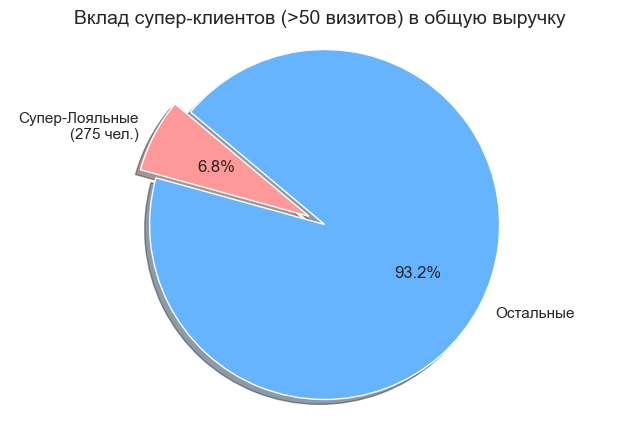


💡 БИЗНЕС-ИНСАЙТ:
Всего 0.64% клиентов генерируют 6.81% всей выручки компании.
Их средний чек НИЖЕ, но они берут частотой посещений.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Подготовка (Если код запускается отдельно) ---
# Убедимся, что у нас есть список ID супер-клиентов из прошлого шага
# Предполагаем, что df уже загружен, даты обработаны. 
# Повторим логику поиска ID для автономности кода:
daily_visits = df.groupby('client')['tr_date'].nunique()
loyal_client_ids = daily_visits[daily_visits > 50].index

print(f"💎 Супер-лояльных клиентов (>50 визитов): {len(loyal_client_ids)}")

# --- 2. Сегментация данных ---
# Используем isin() для быстрого разделения всего массива транзакций
# mask_loyal - это маска (True/False)
mask_loyal = df['client'].isin(loyal_client_ids)

df_loyal = df[mask_loyal]   # Транзакции ТОП клиентов
df_regular = df[~mask_loyal] # Транзакции всех остальных (тильда ~ означает НЕ)

# --- 3. Расчет метрик (Выручка) ---
rev_loyal = df_loyal['amount'].sum()
rev_regular = df_regular['amount'].sum()
total_rev = rev_loyal + rev_regular

# --- 4. Расчет метрик (Визиты и Средний чек) ---
# Нам нужно количество уникальных визитов (дней) для каждой группы
visits_loyal_count = df_loyal.groupby(['client', 'tr_date']).ngroups
visits_regular_count = df_regular.groupby(['client', 'tr_date']).ngroups

# Средний чек = Выручка / Кол-во визитов
avg_check_loyal = rev_loyal / visits_loyal_count if visits_loyal_count > 0 else 0
avg_check_regular = rev_regular / visits_regular_count if visits_regular_count > 0 else 0

# --- 5. Сводная таблица результатов ---
stats_df = pd.DataFrame({
    'Группа': ['Супер-Лояльные (>50)', 'Обычные (<=50)'],
    'Кол-во клиентов': [len(loyal_client_ids), df['client'].nunique() - len(loyal_client_ids)],
    'Выручка (руб)': [rev_loyal, rev_regular],
    'Доля выручки (%)': [rev_loyal/total_rev*100, rev_regular/total_rev*100],
    'Средний чек (руб)': [avg_check_loyal, avg_check_regular]
}).set_index('Группа').round(2)

print("\n📊 СРАВНИТЕЛЬНЫЙ АНАЛИЗ:")
print("="*60)
print(stats_df)
print("="*60)

# --- 6. Визуализация (Вклад в выручку) ---
plt.figure(figsize=(8, 5))

# Данные для графика
labels = [f'Супер-Лояльные\n({len(loyal_client_ids)} чел.)', 'Остальные']
sizes = [rev_loyal, rev_regular]
colors = ['#ff9999','#66b3ff'] # Красный для важных, синий для остальных
explode = (0.1, 0)  # "Выдвинуть" кусок пирога лояльных

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Вклад супер-клиентов (>50 визитов) в общую выручку', fontsize=14)
plt.axis('equal') # Чтобы круг был кругом
plt.show()

# --- 7. Текстовый вывод (Инсайт) ---
share_clients = (len(loyal_client_ids) / df['client'].nunique()) * 100
share_revenue = (rev_loyal / total_rev) * 100
multiplier = avg_check_loyal / avg_check_regular

print(f"\n💡 БИЗНЕС-ИНСАЙТ:")
print(f"Всего {share_clients:.2f}% клиентов генерируют {share_revenue:.2f}% всей выручки компании.")
if multiplier > 1:
    print(f"Их средний чек в {multiplier:.1f} раза ВЫШЕ, чем у обычных посетителей.")
else:
    print(f"Их средний чек НИЖЕ, но они берут частотой посещений.")

Промпт 

Сегментация: Раздели ассортимент на два сегмента: "Premium" (цена >= 10 000) и "Mass Market" (цена < 10 000). Используй список item из предыдущего шага для фильтрации.
Расчет метрик: Для каждого сегмента посчитай:
Количество уникальных товаров (SKU).
Общую выручку (Revenue).
Общее количество проданных единиц (Quantity).
Визуализация: Построй два круговых графика (Pie Chart) рядом:
Слева: Доля в количестве товаров (SKU).
Справа: Доля в выручке (Revenue).
Вывод: Сделай вывод о том, оправдана ли ставка на дорогие товары.

💎 Найдено Premium-товаров: 514

📊 СРАВНЕНИЕ СЕГМЕНТОВ:
                      SKU  Доля SKU (%)    Выручка  Доля Выручки (%)
Premium (>=10k)       514          1.68   44142223              7.02
Mass Market (<10k)  30052         98.32  584466119             92.98


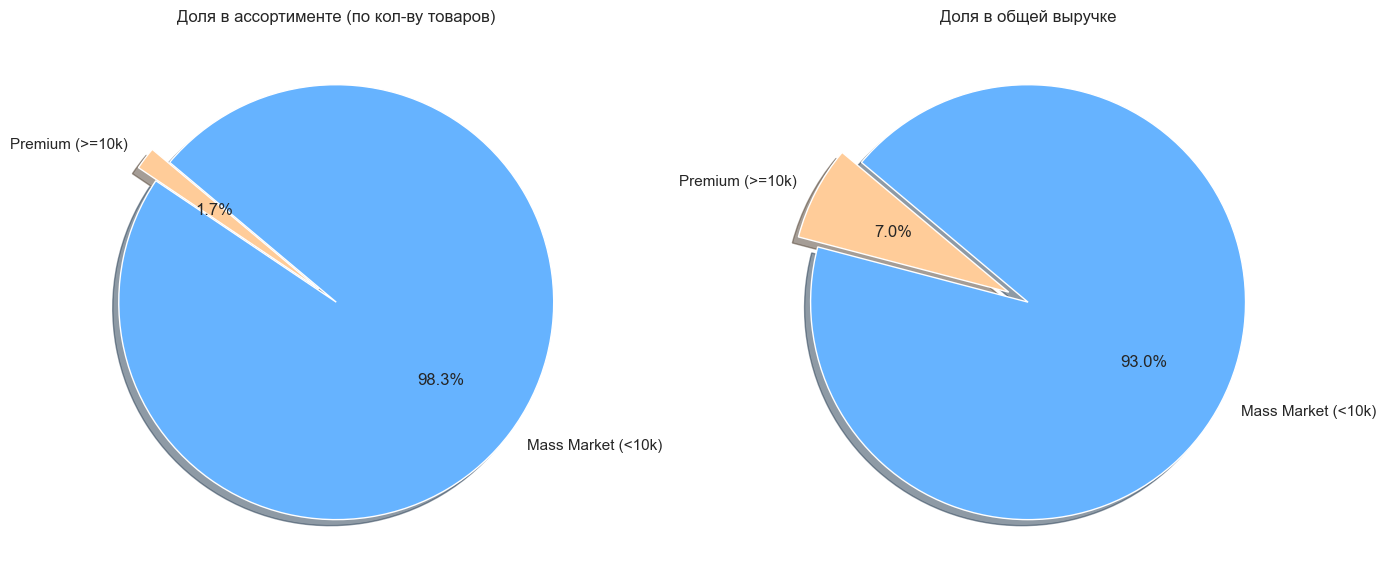


💡 БИЗНЕС-ВЫВОД:
Товары сегмента Premium занимают 1.7% ассортимента.
При этом они приносят 7.0% всей выручки.
✅ Эффективность высокая! Каждый 1% ассортимента Premium приносит 4.18% выручки.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Подготовка списка дорогих товаров (для автономности кода) ---
# Повторяем логику предыдущего шага, чтобы получить список ID
product_summary = df.groupby('item').agg(
    quantity=('quantity', 'sum'),
    total_amount=('amount', 'sum')
).reset_index()

# Считаем среднюю цену
product_summary['avg_price'] = product_summary['total_amount'] / product_summary['quantity']
product_summary['avg_price'] = product_summary['avg_price'].fillna(0)

# Получаем список "Premium" товаров (ID)
premium_items = product_summary[product_summary['avg_price'] >= 10000]['item'].tolist()

print(f"💎 Найдено Premium-товаров: {len(premium_items)}")

# --- 2. Сегментация транзакций ---
# Делим весь датафрейм на две части
mask_premium = df['item'].isin(premium_items)

df_premium = df[mask_premium]   # Транзакции с дорогими товарами
df_mass = df[~mask_premium]     # Транзакции с остальными товарами

# --- 3. Расчет ключевых метрик ---
metrics = {
    'Premium (>=10k)': {
        'SKU': len(premium_items),
        'Выручка': df_premium['amount'].sum(),
        'Продажи (шт)': df_premium['quantity'].sum()
    },
    'Mass Market (<10k)': {
        'SKU': df['item'].nunique() - len(premium_items),
        'Выручка': df_mass['amount'].sum(),
        'Продажи (шт)': df_mass['quantity'].sum()
    }
}

# Создаем DataFrame для удобства
stats_df = pd.DataFrame(metrics).T
total_revenue = stats_df['Выручка'].sum()
total_sku = stats_df['SKU'].sum()

# Добавляем доли в %
stats_df['Доля SKU (%)'] = (stats_df['SKU'] / total_sku) * 100
stats_df['Доля Выручки (%)'] = (stats_df['Выручка'] / total_revenue) * 100

print("\n📊 СРАВНЕНИЕ СЕГМЕНТОВ:")
print("="*60)
print(stats_df[['SKU', 'Доля SKU (%)', 'Выручка', 'Доля Выручки (%)']].round(2))
print("="*60)

# --- 4. Визуализация (Сравнение вкладов) ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Цветовая палитра
colors = ['#ffcc99', '#66b3ff'] # Оранжевый для Premium, Синий для Mass

# График 1: Доля в ассортименте (SKU)
axes[0].pie(stats_df['SKU'], labels=stats_df.index, autopct='%1.1f%%', 
            startangle=140, colors=colors, explode=(0.1, 0), shadow=True)
axes[0].set_title('Доля в ассортименте (по кол-ву товаров)')

# График 2: Доля в деньгах (Выручка)
axes[1].pie(stats_df['Выручка'], labels=stats_df.index, autopct='%1.1f%%', 
            startangle=140, colors=colors, explode=(0.1, 0), shadow=True)
axes[1].set_title('Доля в общей выручке')

plt.tight_layout()
plt.show()

# --- 5. Бизнес-инсайт (Автоматический) ---
premium_share_sku = stats_df.loc['Premium (>=10k)', 'Доля SKU (%)']
premium_share_rev = stats_df.loc['Premium (>=10k)', 'Доля Выручки (%)']

efficiency_index = premium_share_rev / premium_share_sku

print(f"\n💡 БИЗНЕС-ВЫВОД:")
print(f"Товары сегмента Premium занимают {premium_share_sku:.1f}% ассортимента.")
print(f"При этом они приносят {premium_share_rev:.1f}% всей выручки.")

if efficiency_index > 1:
    print(f"✅ Эффективность высокая! Каждый 1% ассортимента Premium приносит {efficiency_index:.2f}% выручки.")
else:
    print(f"⚠️ Эффективность ниже среднего. Premium товары работают хуже, чем масс-маркет.")

Промпт 

Подготовка периодов:
Период 1: Весь датасет.
Период 2: Последние 6 месяцев от максимальной даты.
Функция расчета ABC-XYZ: Напиши функцию, которая для переданного датафрейма:
Считает ABC по выручке (amount). Границы: A (0-80%), B (80-95%), C (95-100%).
Считает XYZ по стабильности спроса (quantity). Коэффициент вариации (CV): X (0-10%), Y (10-25%), Z (>25%).
Важно: Для товаров с одной продажей (std=NaN) считаем CV = 0.
Сравнение:
Сделай расчет для обоих периодов.
Объедини результаты по индексу товара (item) (INNER JOIN — только товары, продававшиеся в оба периода).
Отфильтруй товары, у которых класс за 6 месяцев не совпадает с классом за все время.
Результат:
Посчитай средний коэффициент вариации (из данных за 6 месяцев) для этих «изменившихся» товаров.
Округли ответ до 1 знака после запятой.

In [12]:
import pandas as pd
import numpy as np

# --- 1. Проверка и подготовка данных ---
if 'df' not in globals():
    # Если df нет, пробуем загрузить (для автономности)
    try:
        df = pd.read_csv('transactions_diy.csv')
    except:
        raise NameError("❌ Переменная 'df' не найдена и файл не загружен.")

# Предобработка
df['tr_date'] = pd.to_datetime(df['tr_date'], format='%d.%m.%Y', errors='coerce')
df = df.dropna(subset=['tr_date'])

# --- 2. Универсальная функция для ABC-XYZ ---
def get_abc_xyz_stats(data):
    """
    Возвращает DataFrame с индексом item и колонками:
    - group (строка, например 'AX')
    - cv (число, коэффициент вариации в %)
    """
    # 1. Агрегация
    stats = data.groupby('item').agg({
        'amount': 'sum',
        'quantity': ['mean', 'std']
    })
    stats.columns = ['sum_amount', 'mean_qty', 'std_qty']
    
    # 2. ABC (по выручке)
    total_sales = stats['sum_amount'].sum()
    cum_share = stats['sum_amount'].sort_values(ascending=False).cumsum() / total_sales * 100
    
    # Векторизация через pd.cut (быстрее apply)
    abc_series = pd.cut(
        cum_share, 
        bins=[-1, 80, 95, 101], 
        labels=['A', 'B', 'C'], 
        right=True
    )
    
    # 3. XYZ (по количеству)
    # Обработка NaN в std (если была 1 продажа -> 0 вариации)
    stats['std_qty'] = stats['std_qty'].fillna(0)
    
    # Расчет CV, защита от деления на 0
    stats['cv'] = (stats['std_qty'] / stats['mean_qty']) * 100
    stats['cv'] = stats['cv'].replace([np.inf, -np.inf], 0).fillna(0)
    
    xyz_series = pd.cut(
        stats['cv'], 
        bins=[-1, 10, 25, float('inf')], 
        labels=['X', 'Y', 'Z'],
        right=False # [0, 10), [10, 25), [25, inf)
    )
    
    # Сборка результата
    result = pd.DataFrame(index=stats.index)
    result['group'] = abc_series.astype(str) + xyz_series.astype(str)
    result['cv'] = stats['cv']
    
    return result

# --- 3. Расчет по периодам ---
# А. За все время
res_all = get_abc_xyz_stats(df)

# Б. За последние 6 месяцев
last_date = df['tr_date'].max()
start_date_6m = last_date - pd.DateOffset(months=6)
df_6m = df[df['tr_date'] >= start_date_6m]
res_6m = get_abc_xyz_stats(df_6m)

# --- 4. Объединение и анализ изменений ---
# Соединяем по 'item' (индексу), суффиксы для различия колонок
merged = res_all.join(res_6m, lsuffix='_all', rsuffix='_6m', how='inner')

print(f"📦 Товаров, продававшихся в обоих периодах: {len(merged)}")

# Фильтр: класс изменился
changed_items = merged[merged['group_all'] != merged['group_6m']]
count_changed = len(changed_items)

print(f"🔄 Товаров с изменившейся категорией: {count_changed}")

# --- 5. Расчет среднего CV и вывод ---
if count_changed > 0:
    # Берем CV из периода "6 месяцев", так как он отражает текущую нестабильность
    avg_cv = changed_items['cv_6m'].mean()
    print(f"\n🎯 Средний коэффициент вариации (CV) у товаров с изменением: {avg_cv:.1f}")
    
    # Пример (опционально)
    print("\nПримеры изменений:")
    print(changed_items[['group_all', 'group_6m', 'cv_6m']].head())
else:
    print("Изменений в категориях не найдено.")

📦 Товаров, продававшихся в обоих периодах: 21824
🔄 Товаров с изменившейся категорией: 7512

🎯 Средний коэффициент вариации (CV) у товаров с изменением: 19.9

Примеры изменений:
         group_all group_6m      cv_6m
item                                  
sku10000        BZ       CZ  61.658108
sku10001        CZ       CX   0.000000
sku10009        BY       BX   0.000000
sku10011        CY       CX   0.000000
sku10013        BX       AX   0.000000


Самое трудное — это описать конкретные требования и очистку данных.
Я забыл много функций. Он может помочь с оптимизацией, даже если я не умею программировать. Он может прямо генерировать код.

